In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
airpas = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\ML PROJECT\AirPassengers.csv")

In [9]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
airpas.Month = pd.to_datetime(airpas.Month , infer_datetime_format=True)

In [12]:
airpas = airpas.set_index(['Month'])

In [13]:
airpas

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
airpas.shape

(144, 1)

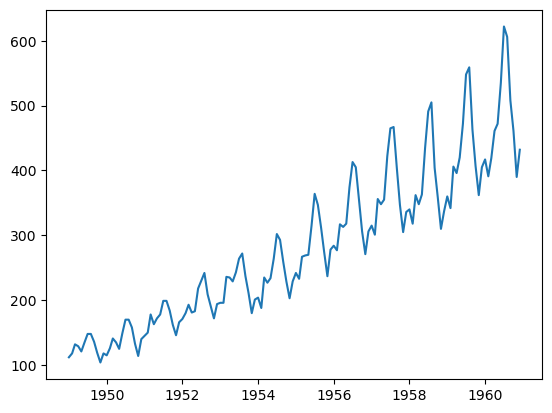

In [15]:
plt.plot(airpas
        )

In [16]:
air_log = np.log(airpas)

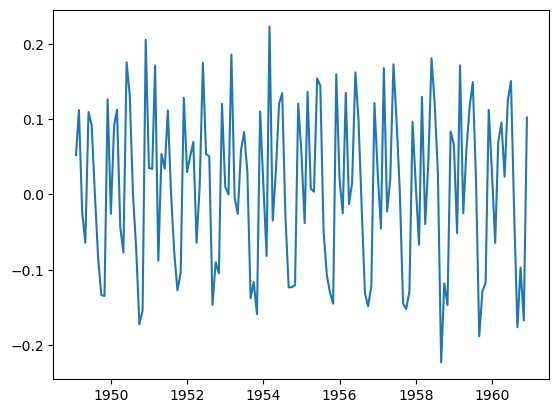

In [18]:
plt.plot(air_log.diff())

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [20]:
result = seasonal_decompose(air_log)

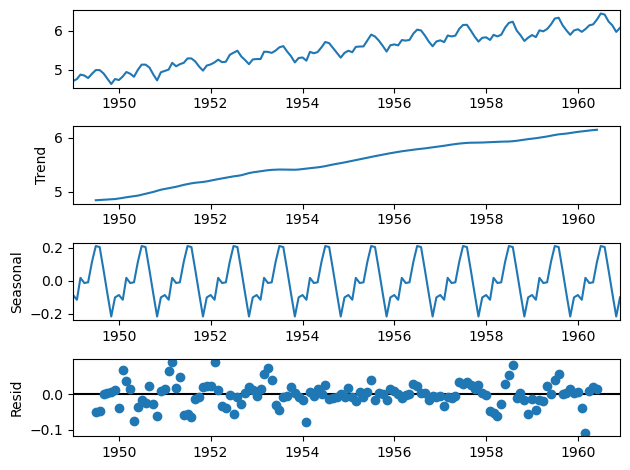

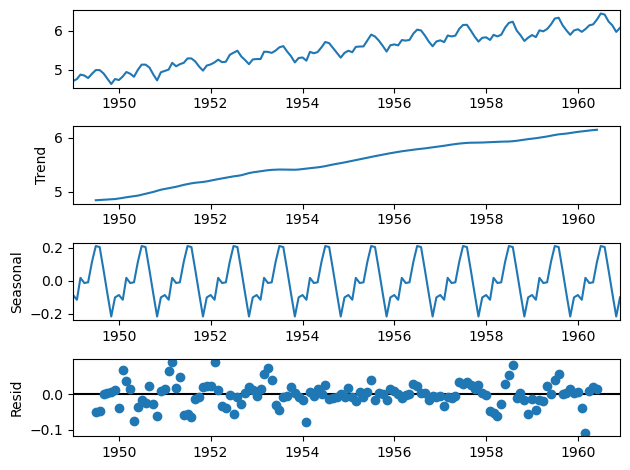

In [22]:
result.plot()

In [23]:
auto_arima(air_log , seasonal= True , m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [25]:
 model_sarima =SARIMAX(air_log , order=(2,0,0),seasonal_order=(0,1,1,12))

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
air_model = model_sarima.fit()

In [28]:
pred_values = air_model.predict(start =144 , end=155)

In [29]:
pred_values

1961-01-01    6.103809
1961-02-01    6.045759
1961-03-01    6.162433
1961-04-01    6.188854
1961-05-01    6.220876
1961-06-01    6.355804
1961-07-01    6.493128
1961-08-01    6.487477
1961-09-01    6.307991
1961-10-01    6.191121
1961-11-01    6.044345
1961-12-01    6.147656
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
pred_values1 = np.exp(pred_values).round()

In [33]:
pred_values1

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    661.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    468.0
Freq: MS, Name: predicted_mean, dtype: float64

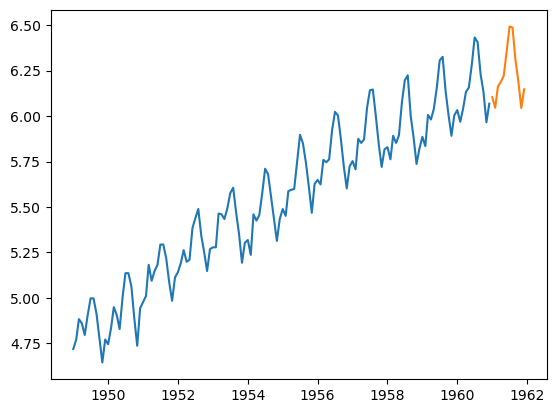

In [34]:
plt.plot(air_log)
plt.plot(pred_values)

In [36]:
df= pd.DataFrame()
df['predicted']= pred_values1
date_of_pred = ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01'
               ,'1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']
df['Month'] = date_of_pred
df.Month = pd.to_datetime(df.Month , infer_datetime_format=True)
df.set_index(['Month'])

,predicted
Month,
1961-01-01,448.0
1961-02-01,422.0
1961-03-01,475.0
1961-04-01,487.0
1961-05-01,503.0
1961-06-01,576.0
1961-07-01,661.0
1961-08-01,657.0
1961-09-01,549.0


<Axes: xlabel='Month'>

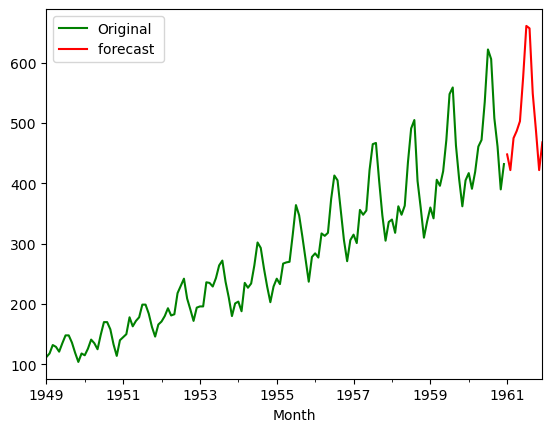

In [38]:
airpas['Passengers'].plot(legend = True , label = 'Original', color= "green")
df['predicted'].plot(legend = True , label = "forecast ", color = 'red')